In [27]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [28]:
dengue = pd.read_csv('datasets\\Dengue.csv')

In [29]:
dengue

,Month,Year,Region,Dengue_Cases,Dengue_Deaths
0,January,2016,Region I,705,1
1,February,2016,Region I,374,0
2,March,2016,Region I,276,0
3,April,2016,Region I,240,2
4,May,2016,Region I,243,1
...,...,...,...,...,...
1015,August,2020,BARMM,91,0
1016,September,2020,BARMM,16,8
1017,October,2020,BARMM,13,9
1018,November,2020,BARMM,15,1


In [30]:
dengue.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Month          1020 non-null   object
 1   Year           1020 non-null   int64 
 2   Region         1020 non-null   object
 3   Dengue_Cases   1020 non-null   int64 
 4   Dengue_Deaths  1020 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 40.0+ KB


In [31]:
dengue.describe()

,Year,Dengue_Cases,Dengue_Deaths
count,1020.000000,1020.000000,1020.000000
mean,2018.000000,1124.926471,16.513725
std,1.414907,1662.608878,96.358215
min,2016.000000,10.000000,0.000000
25%,2017.000000,247.750000,1.000000
50%,2018.000000,582.500000,3.000000
75%,2019.000000,1284.250000,7.000000
max,2020.000000,21658.000000,1651.000000


In [32]:
dengue['Month'] = dengue['Month'].astype('category')
dengue['Region'] = dengue['Region'].astype('category')

In [33]:
dengue.dtypes

Month            category
Year                int64
Region           category
Dengue_Cases        int64
Dengue_Deaths       int64
dtype: object

<h1>Total Dengue Cases and Deaths per Year</h1>

Total dengue cases and deaths per year
      Dengue_Cases  Dengue_Deaths
Year                             
2016        209544           8127
2017        154155           4563
2018        250783           1226
2019        441902           1733
2020         91041           1195


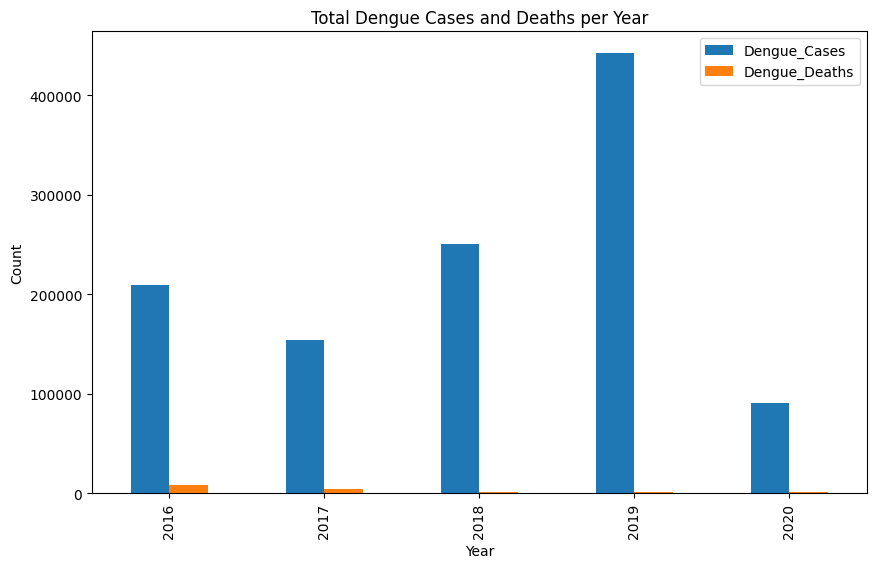

In [34]:
total_yearly = dengue.groupby('Year')[['Dengue_Cases', 'Dengue_Deaths']].sum()
print("Total dengue cases and deaths per year")
print(total_yearly)

total_yearly.plot(kind='bar', figsize=(10,6), title="Total Dengue Cases and Deaths per Year")
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

<h1>Insight#1. 
    
  In Dengue Cases 2019 has the highest Dengue Cases and the count of 44000, and the Dengue Deaths in 2019 has 0.49%, so that there are low Dengue Deaths in that year</h1>

<h1>Insight#2. 
    
Dengue Cases per Year, we can see that Dengue Cases, but we can see how different was in 2018, but all of the year has a low Dengue Deaths, Most are just the dengue cases</h1>

<h1>Top 5 regions with highest cases counts</h1>

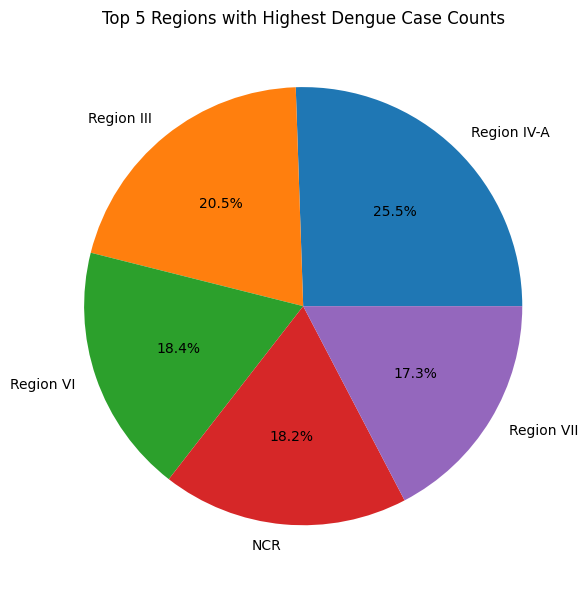

In [35]:
top_5_regions = dengue.groupby('Region')['Dengue_Cases'].sum().nlargest(5)

plt.figure(figsize=(10, 6))
top_5_regions.plot(kind='pie', autopct='%1.1f%%')
plt.title('Top 5 Regions with Highest Dengue Case Counts')
plt.ylabel('')
plt.tight_layout()
plt.show()

<h1>Insight#3. 
   
We can see the highest region, so the Top 5 highest regions are Region IV-A is 25.5% and next is the Region III that has the 20.5%, the third is the Region IV has 18.4%and next is NCR 18.2% and last is Region VII has 17.3%</h1>

<h1>Regional Heatmap of dengue cases</h1>

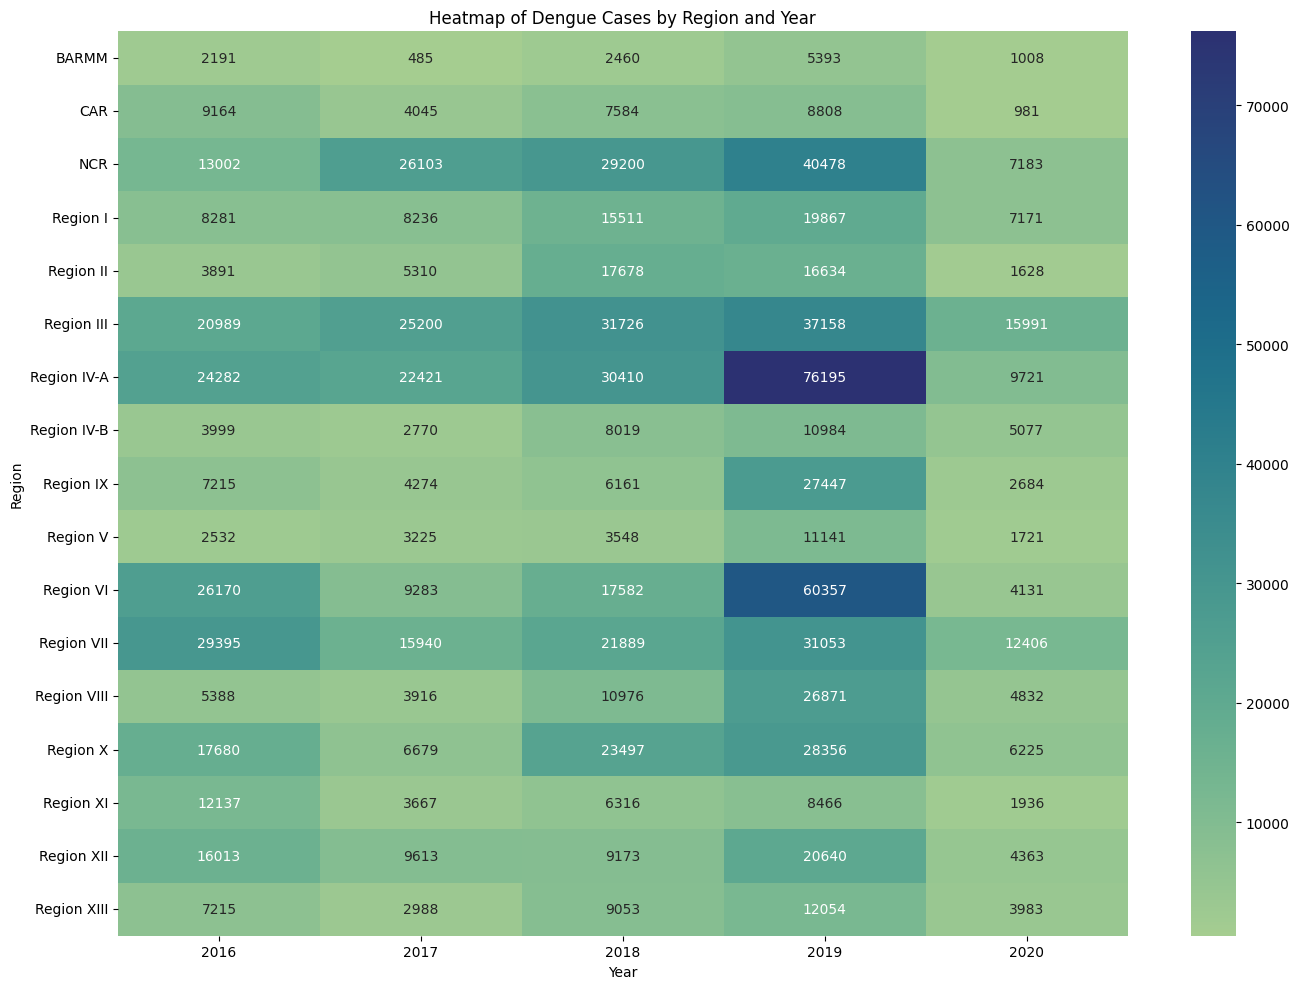

In [36]:
pivot_dengue = dengue.pivot_table(values='Dengue_Cases', index='Region', columns='Year', aggfunc='sum')

plt.figure(figsize=(14, 10))
sns.heatmap(pivot_dengue, cmap='crest', annot=True, fmt='g')
plt.title('Heatmap of Dengue Cases by Region and Year')
plt.xlabel('Year')
plt.ylabel('Region')
plt.tight_layout()
plt.show()

<h1>Insight #4. 

We can see in the heatmap that every region in the dengue cases every year, the dark blue is the highest cases which is the Region VI-A in year 2019 has the 76195 and the average is 39.91% compare it to year 2018, the size of the Dengue Cases encrease in a year</h1>

<h1>Insight #5.

In Region IV, Also the Year 2019 has the highest Dengue Cases, it has the 60357, and the average of 29.13% increase in 2019</h1>

<h1>Year-over-Year growth rate</h1>

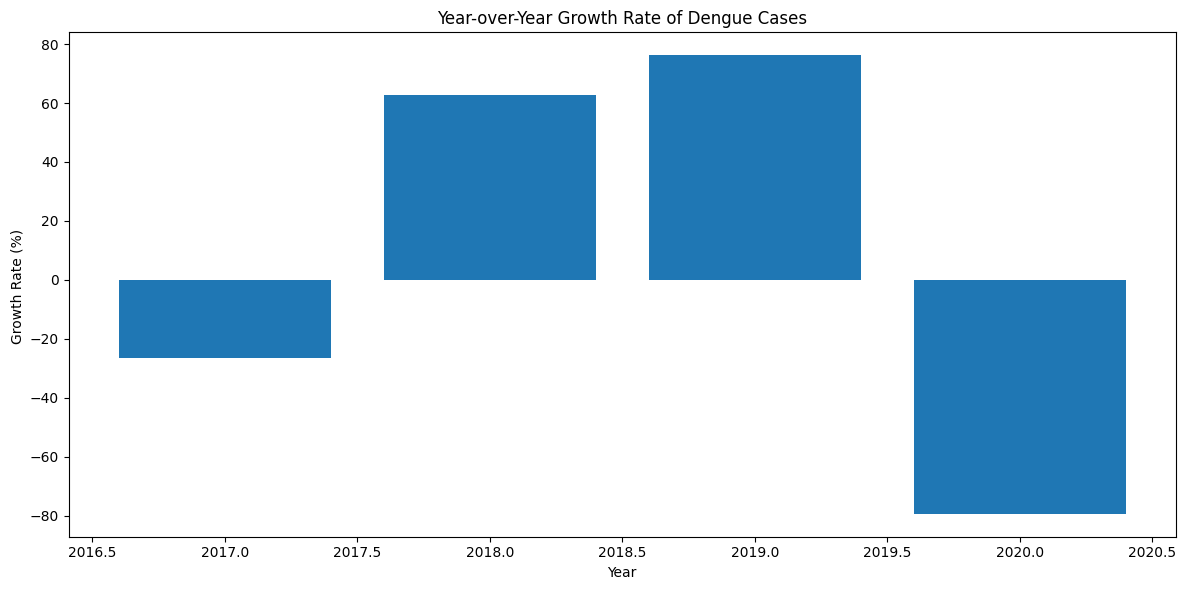

In [37]:
annual_cases = dengue.groupby('Year')['Dengue_Cases'].sum().reset_index()
annual_cases['Growth_rate'] = annual_cases['Dengue_Cases'].pct_change() * 100

plt.figure(figsize=(12, 6))
plt.bar(annual_cases['Year'], annual_cases['Growth_rate'])
plt.title('Year-over-Year Growth Rate of Dengue Cases')
plt.xlabel('Year')
plt.ylabel('Growth Rate (%) ')
plt.tight_layout()
plt.show()

<h1>Insight #6. 
    
In over a year, The year 2019 is the highest growth rate and has the average of 75%</h1>

<h1>Insight #7. 
    
In 2018, only a few Dengue Cases were reported before 2019, and the average of 5%</h1>

<h1>Regional Case fatality Rate Comparison</h1>

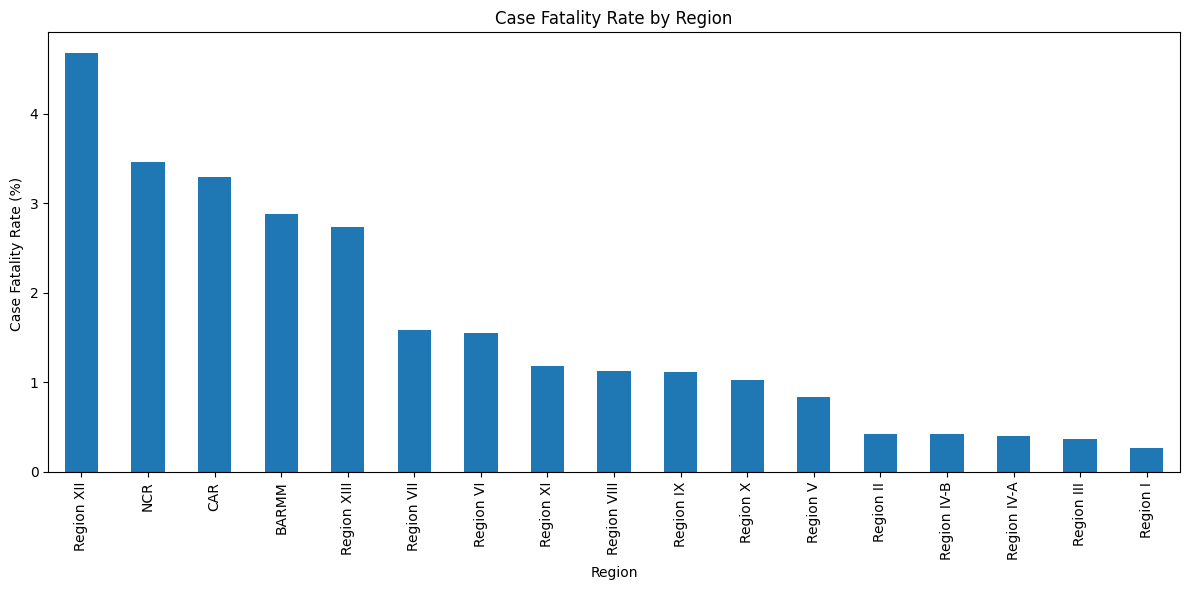

In [38]:
regional_cfr = dengue.groupby('Region')[['Dengue_Cases', 'Dengue_Deaths']].sum()
regional_cfr['cfr'] = (regional_cfr['Dengue_Deaths'] / regional_cfr['Dengue_Cases']) * 100

plt.figure(figsize=(12, 6))
regional_cfr['cfr'].sort_values(ascending=False).plot(kind='bar')
plt.title('Case Fatality Rate by Region')
plt.xlabel('Region')
plt.ylabel('Case Fatality Rate (%) ')
plt.tight_layout()
plt.show()

<h1>Insight #8. 
    
In the Case fatality Rate by Region XII the highest has the average of 4.5% </h1>

<h1>Insight #9. 
    
The Fatality Rate by Region I is the lowest dengue cases which has the growth fatality rate average of 0.5%</h1>

<h1>Dengue Cases by Region</h1>


Regional-wise total dengue cases: 
Region
BARMM           11537
CAR             30582
NCR            115966
Region I        59066
Region II       45141
Region III     131064
Region IV-A    163029
Region IV-B     30849
Region IX       47781
Region V        22167
Region VI      117523
Region VII     110683
Region VIII     51983
Region X        82437
Region XI       32522
Region XII      59802
Region XIII     35293
Name: Dengue_Cases, dtype: int64


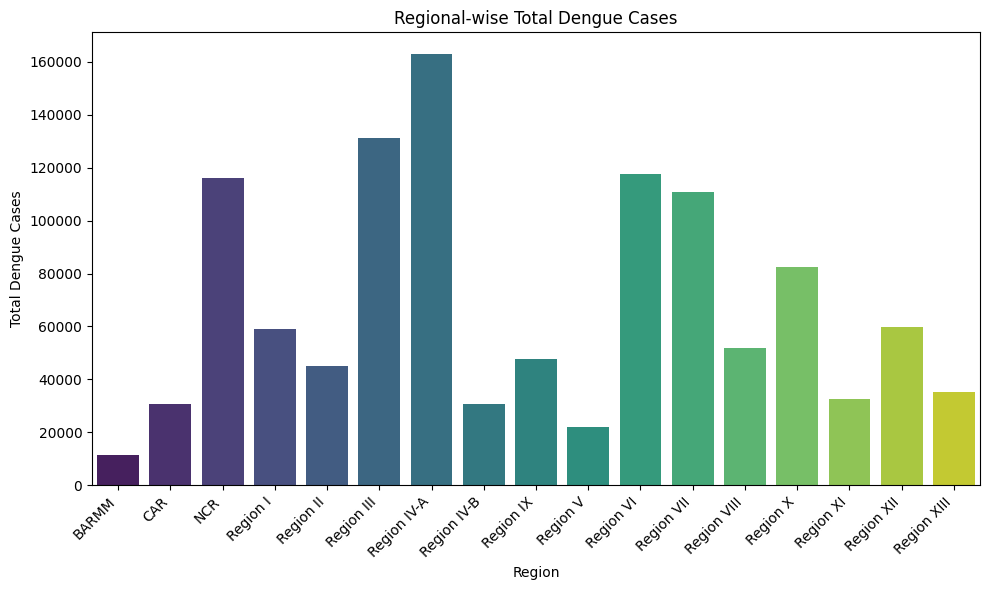

In [39]:
region_total = dengue.groupby('Region')['Dengue_Cases'].sum()
print("\nRegional-wise total dengue cases: ")
print(region_total)

plt.figure(figsize=(10, 6))
sns.barplot(x=region_total.index, y=region_total.values, palette='viridis')
plt.title('Regional-wise Total Dengue Cases')
plt.xlabel('Region')
plt.ylabel('Total Dengue Cases')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

<h1>Insight #10. 
    
In the Region-wise total dengue cases is the most and highest is the Region IV-A and the average is 18.75</h1>

<h1>Insight #11. 
    
We can see this, there are only a few Dengue Cases in Region 3 has the 13000 compare it to the Region IV-A and has the average of 80.74%</h1>

<h1>Correlaton between cases and deaths</h1>

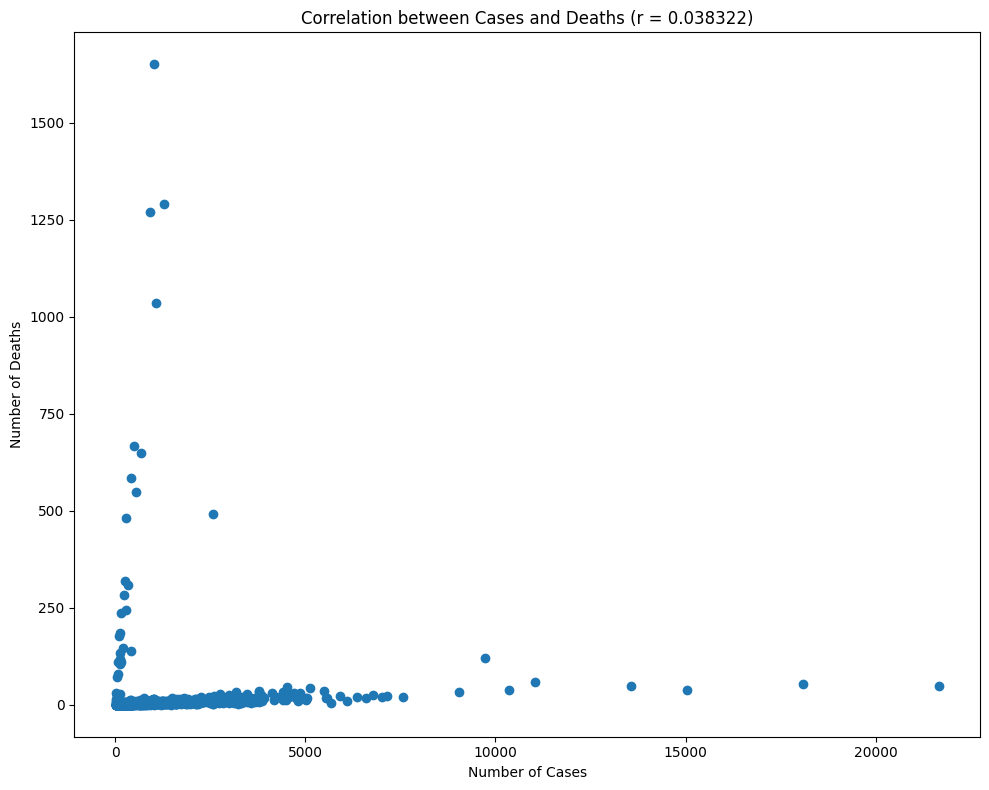

In [40]:
correlation = dengue['Dengue_Cases'].corr(dengue['Dengue_Deaths'])

plt.figure(figsize=(10, 8))
plt.scatter(dengue['Dengue_Cases'], dengue['Dengue_Deaths'])
plt.title(f'Correlation between Cases and Deaths (r = {correlation:2f})')
plt.xlabel('Number of Cases')
plt.ylabel('Number of Deaths')
plt.tight_layout()
plt.show()

<h1>Insight #12. 

By using the scatter, The correlation between the Number of Cases and the Number of Deaths have teh difference and the r is 0.038</h1>

<h1>Insights #13. Number of Cases and Deaths is not the same because we can see most of that case is curing and not causing to deaths</h1>


Monthly average dengue cases: 
Month
April         382.447059
August       2206.517647
December     1040.364706
February      915.305882
January       992.094118
July         1626.376471
June          683.647059
March         677.364706
May           381.023529
November     1116.470588
October      1384.058824
September    2093.447059
Name: Dengue_Cases, dtype: float64


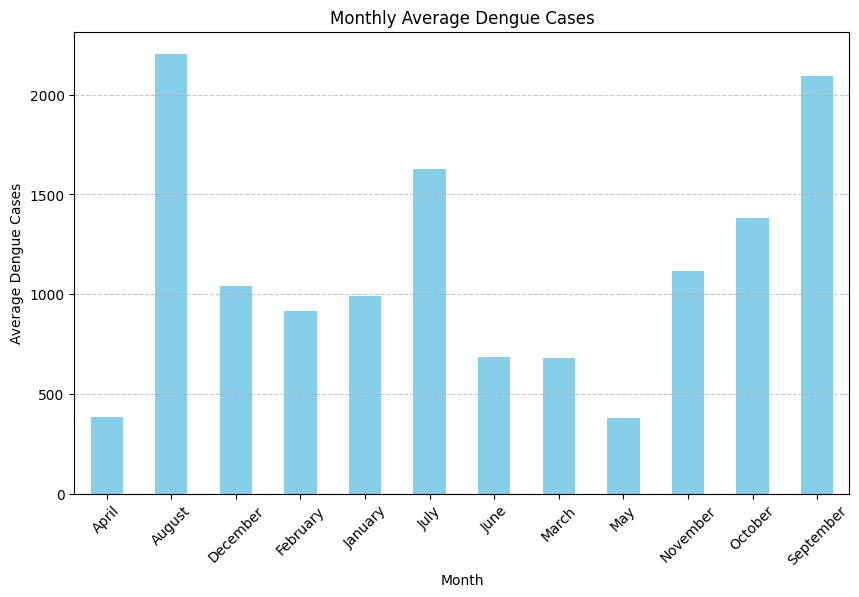

In [41]:
monthly_avg = dengue.groupby('Month')['Dengue_Cases'].mean()
print("\nMonthly average dengue cases: ")
print(monthly_avg)

plt.figure(figsize=(10, 6))
monthly_avg.plot(kind='bar', color='skyblue')
plt.title('Monthly Average Dengue Cases')
plt.xlabel('Month')
plt.ylabel('Average Dengue Cases')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

<h1>Insight #14. 

Monthly average dengue cases across all over the years, and the most Dengue Cases in the Month is August has a 2206.517647 and the average of 17.26%</h1>

<h1>Insight #15. 

The next monthly average dengue cases across all years, and the Month of September has a 382.447059 and the average 18.20%, so we can compare it and we can say that only 4-5% average was raised the cases in 1 month</h1>

<h1>Month with the Highest dengue cases in each region</h1>


Month with the Highest Dengue Cases in each region: 
                                    Year  Dengue_Deaths
Region      Month     Dengue_Cases                     
BARMM       April     10             NaN            NaN
                      12             NaN            NaN
                      13             NaN            NaN
                      15             NaN            NaN
                      16             NaN            NaN
...                                  ...            ...
Region XIII September 11033          NaN            NaN
                      13564          NaN            NaN
                      15047          NaN            NaN
                      18090          NaN            NaN
                      21658          NaN            NaN

[161976 rows x 2 columns]


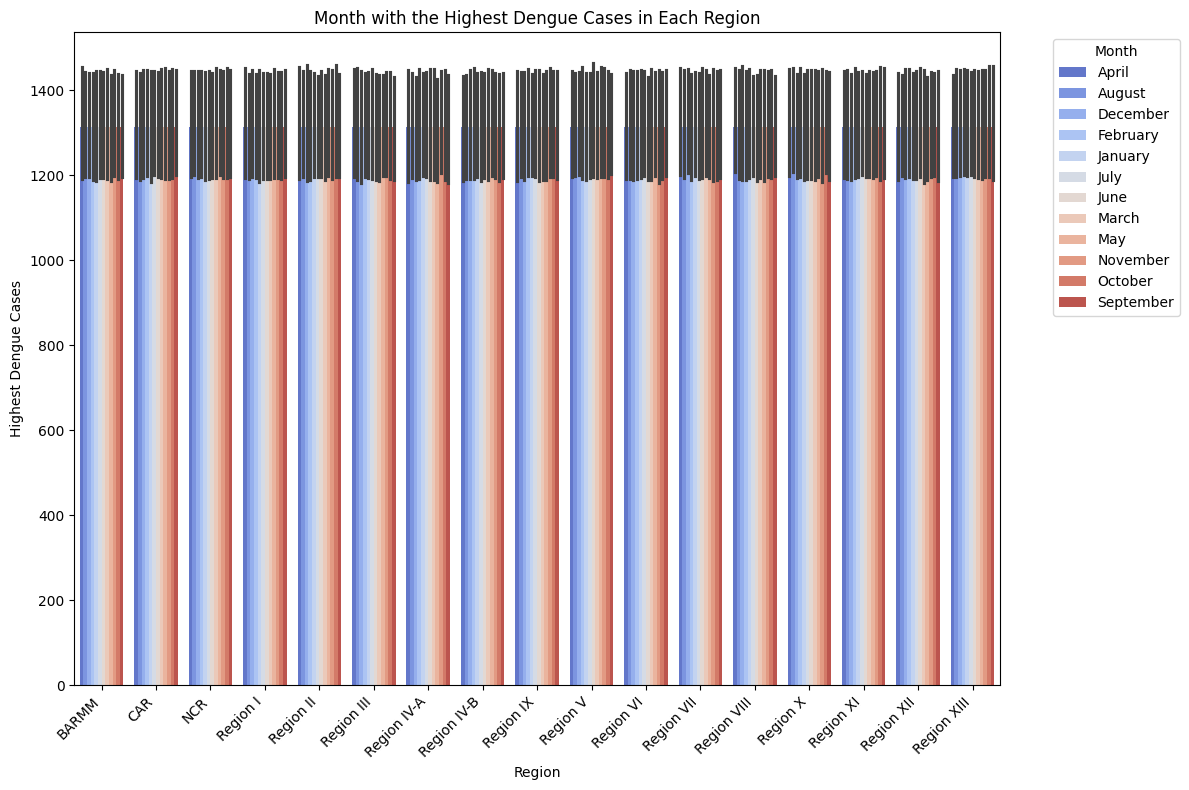

In [42]:
high_month_reg = dengue.groupby(['Region', 'Month', 'Dengue_Cases']).max()
print("\nMonth with the Highest Dengue Cases in each region: ")
print(high_month_reg)

plt.figure(figsize=(12, 8))
sns.barplot(x='Region', y='Dengue_Cases', hue='Month', data=high_month_reg, palette='coolwarm')
plt.title('Month with the Highest Dengue Cases in Each Region')
plt.xlabel('Region')
plt.ylabel('Highest Dengue Cases')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend(title='Month', bbox_to_anchor=(1.05, 1), loc='upper left')  # Place legend outside the plot
plt.tight_layout()
plt.show()

<h1>Insight #16. 
    
Every month has the highest cases in every Region, but in the Region XII in Month of September 21658</h1>

<h1>Monthly Fatality Rate Trend</h1>

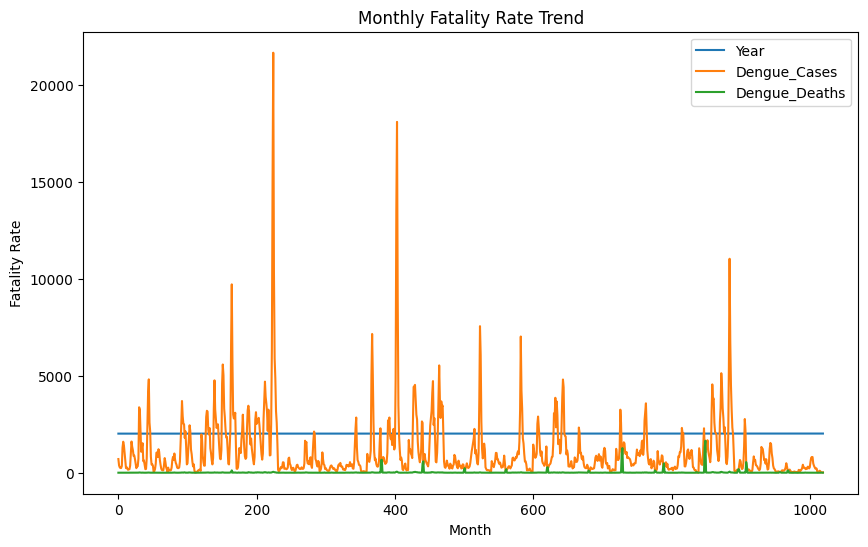

In [43]:
dengue.plot(kind='line', figsize=(10, 6), title="Monthly Fatality Rate Trend")
plt.xlabel('Month')
plt.ylabel('Fatality Rate')
plt.show()

<h1>Insight #17. 
    
In the Month, the highest fatality rate has a Dengue Cases, and it has the 22000</h1>

<h1>Insight #18. 
    
Every Month, the fatality rate in a Dengue Cases, and it has only a small number of Dengue case were reported in this graph</h1>

<h1>Seasonal Dengue Case Distribution</h1>

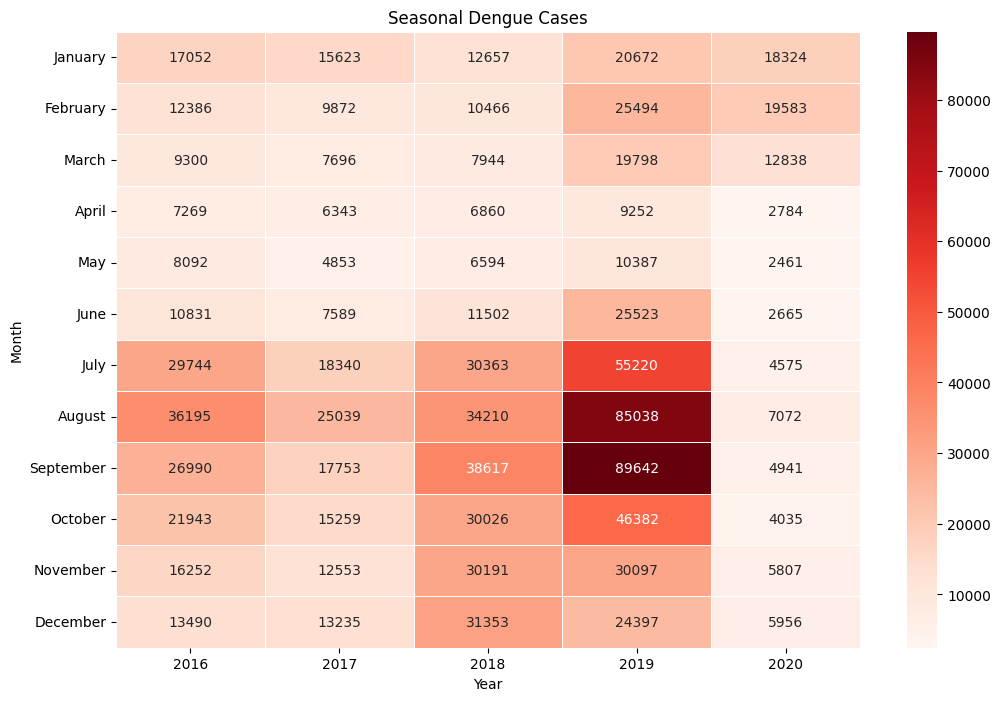

In [44]:
seasonal_cases = dengue.groupby(["Year", "Month"])["Dengue_Cases"].sum().reset_index()

heatmap_data = seasonal_cases.pivot(index="Month", columns="Year", values="Dengue_Cases")

# Sort months for better visualization
months_order = ['January', 'February', 'March', 'April', 'May', 'June', 
                'July', 'August', 'September', 'October', 'November', 'December']
heatmap_data.index = pd.CategoricalIndex(heatmap_data.index, categories=months_order, ordered=True)
heatmap_data = heatmap_data.sort_index()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap="Reds", annot=True, fmt=".0f", linewidths=.5)
plt.title("Seasonal Dengue Cases")
plt.xlabel("Year")
plt.ylabel("Month")
plt.show()

<h1>Insight #19. 
    
Every Month in a Year, the seasonal cases in dengue, we can see the dark red which is the highest in a year of 2019, most of dengue cases in a month of september and august and the average of that 98.64%</h1>

<h1>Insights #20. 
    
In Seasonal Changes in a year, we see the year 2016 to 2020 happened in a dengue cases, most of the cases is 2019 in a month of July, August, September, and October which is pro to dengue</h1>

<h1>Total Dengue Burden (Cases + Deaths) Over Time</h1>

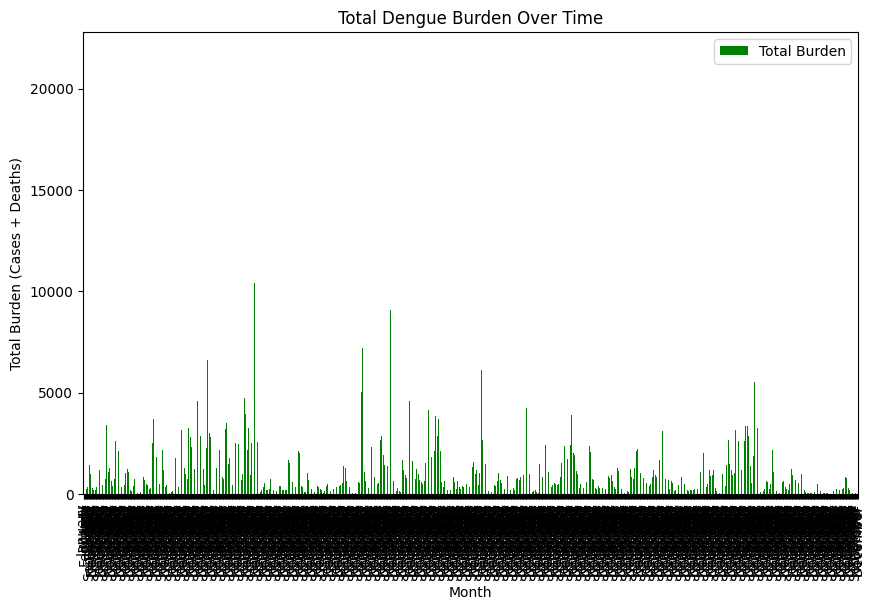

In [46]:
dengue["Total Burden"] = dengue["Dengue_Cases"] + dengue["Dengue_Deaths"]
dengue.plot(x="Month", y="Total Burden", kind="bar", color="green", figsize=(10, 6))
plt.xlabel("Month")
plt.ylabel("Total Burden (Cases + Deaths)")
plt.title("Total Dengue Burden Over Time")
plt.show()